In [1]:
from IPython.display import Image
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

import modules.calc as calc

In [2]:
imageName='res/IMG_2024.jpg'

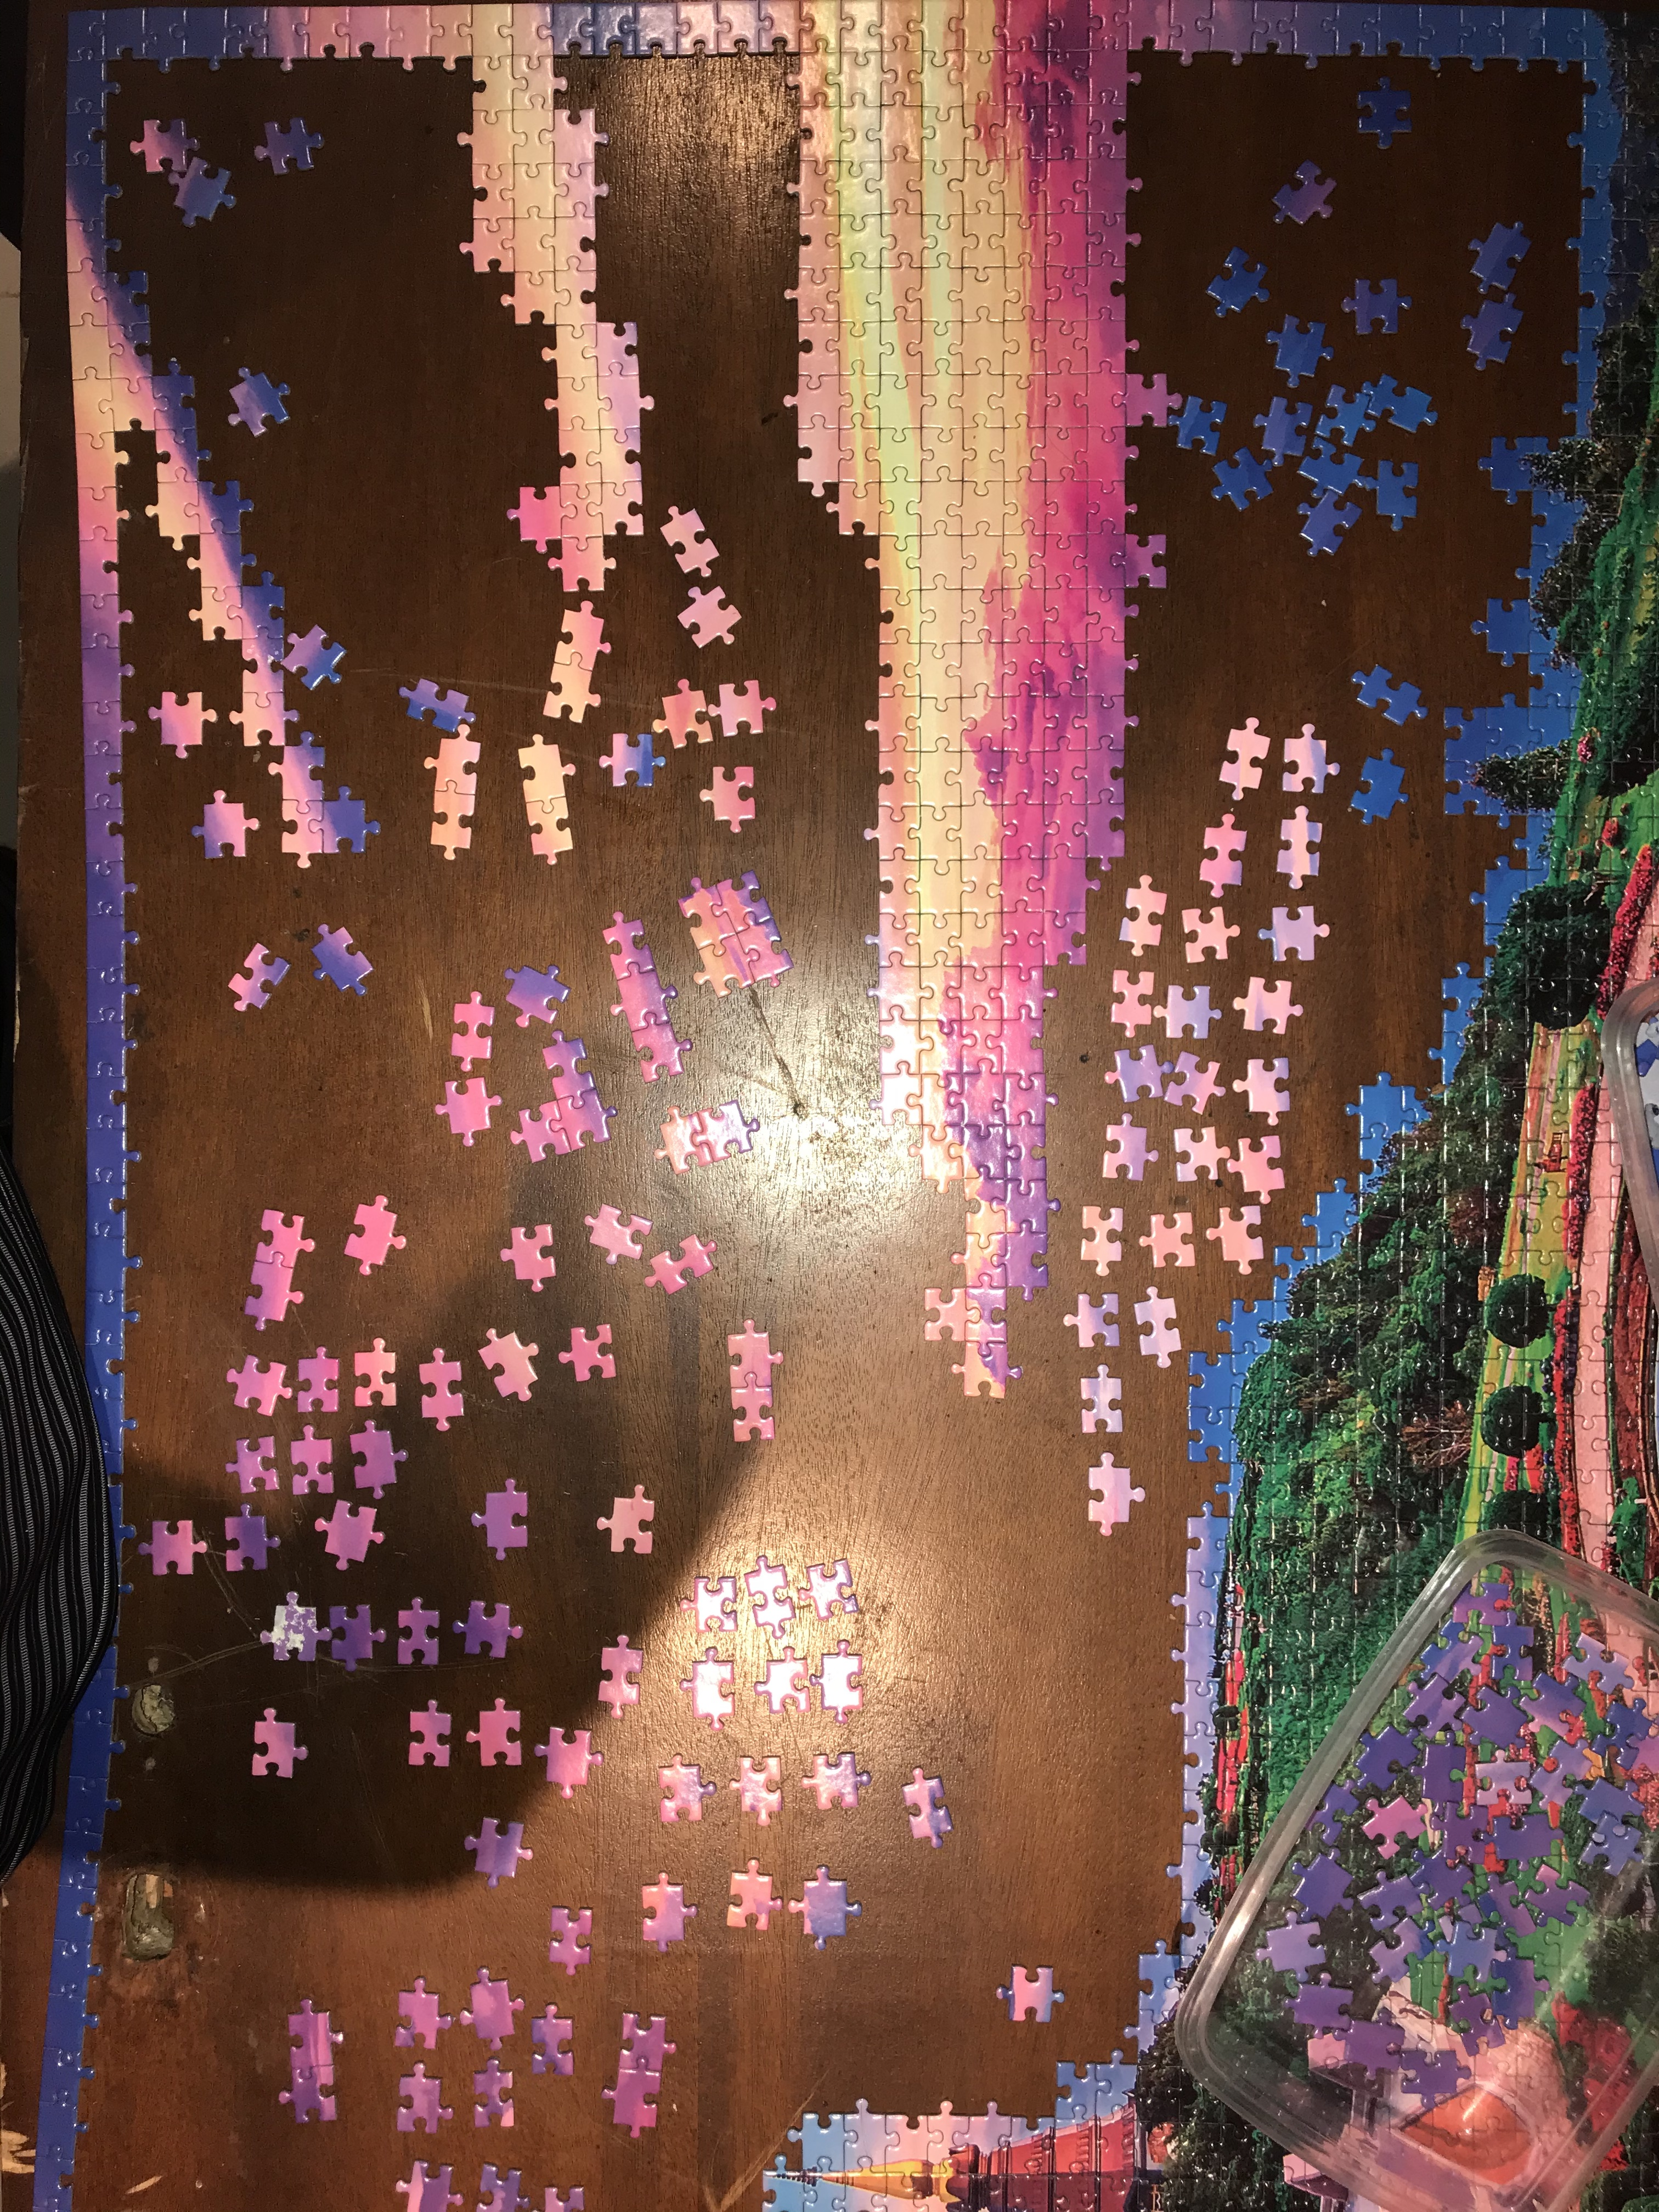

In [3]:
Image(filename=imageName) 

(4032, 3024)


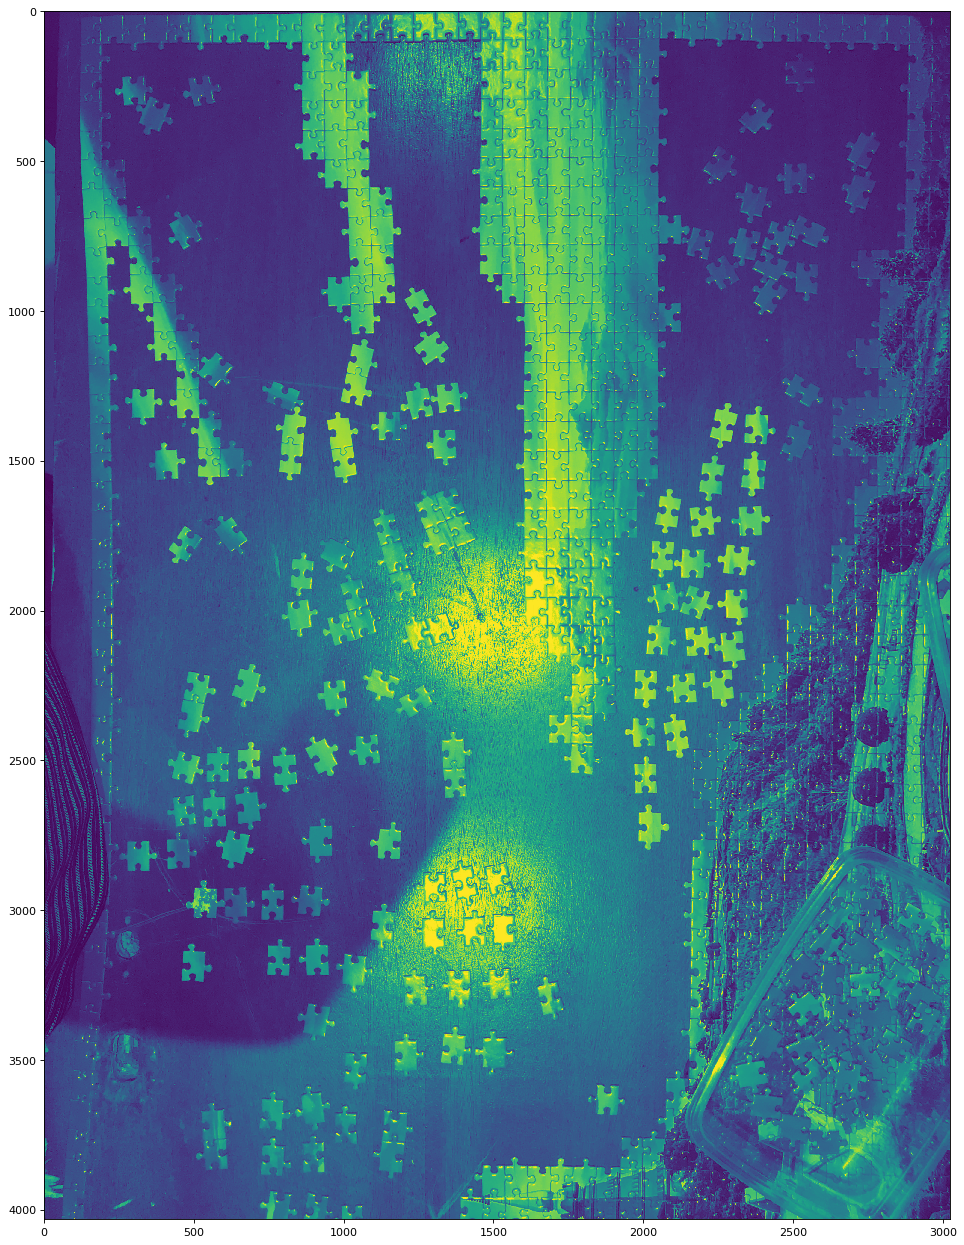

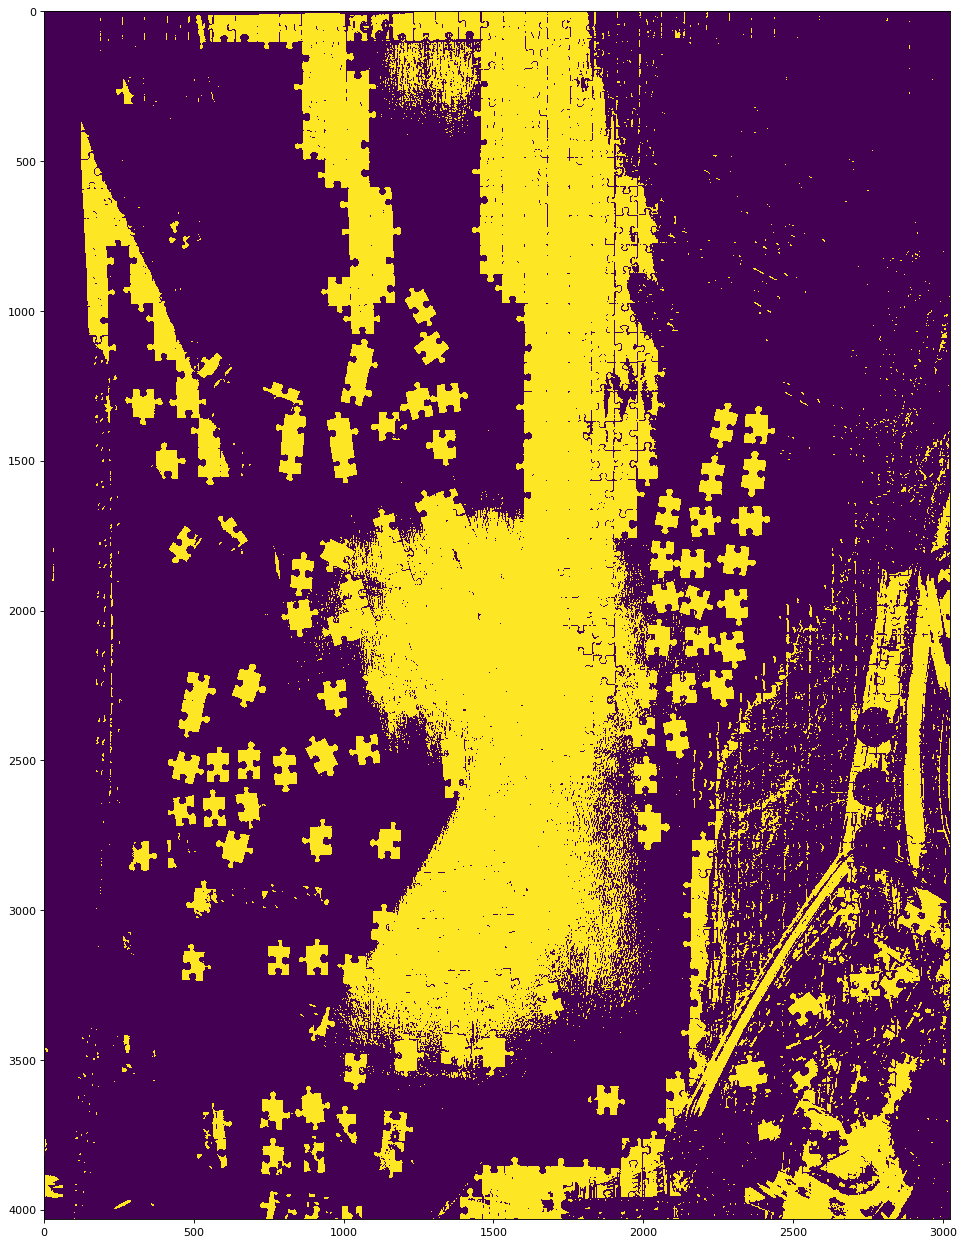

In [4]:
img = cv2.imread(imageName,cv2.IMREAD_GRAYSCALE)#[1000:2500,1000:2500]
print(img.shape)

fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()

# edges = cv2.blur(img,(1, 1))
# fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
# plt.imshow(edges)
# plt.show()

blur = cv2.GaussianBlur(img,(5,5),0)
ret3,edges = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# edges = cv2.Canny(edges,100,100, L2gradient=True)

kernel = np.ones((2,2))
# edges = cv2.erode(edges, kernel, iterations=1)
# edges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel, iterations=1)
# edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
# edges = cv2.dilate(edges,kernel,iterations=2)


#REMOVE SMALL BLOBS (noise)
# nb_components, labels, stats, centroids = cv2.connectedComponentsWithStats(edges, connectivity=8)
# print(nb_components)
# sizes = labels[1:, -1]
# nb_components = nb_components - 1
# min_size = 150
# mask = np.zeros(edges.shape)
# for i in range(0, nb_components):
#     if sizes[i] >= min_size:
#         mask[labels == i + 1] = 255
# edges = edges[mask==255]


fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(edges)
plt.show()

# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


(700, 800, 3)


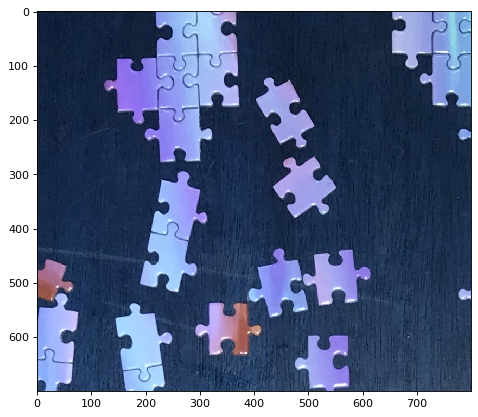

(700, 800)
CONNECTED
23
(700, 800)
(23, 5)
(23, 2)
(700, 800)
PIECES
(22, 700, 800)


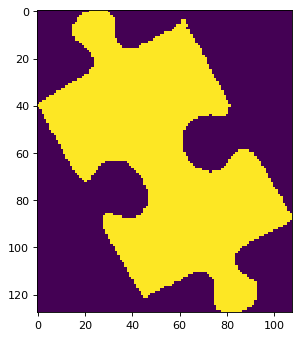

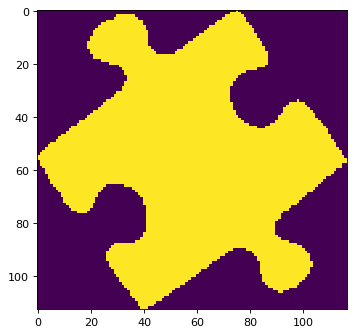

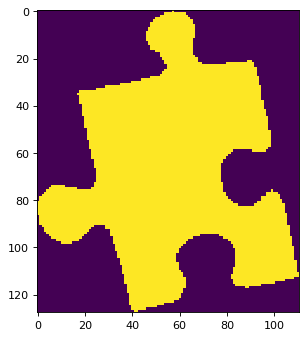

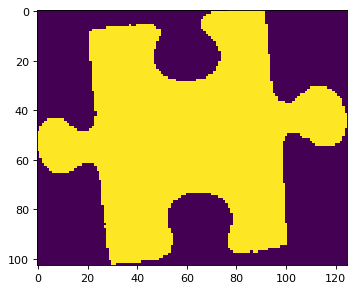

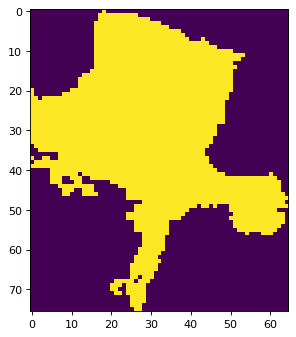

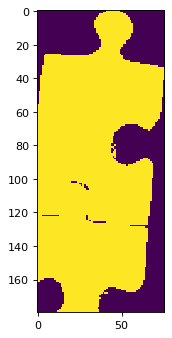

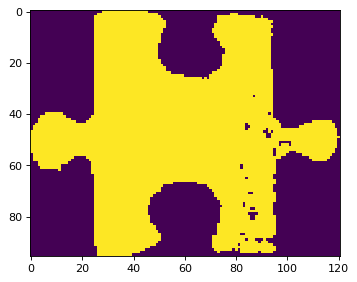

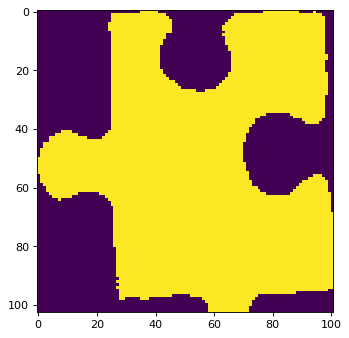

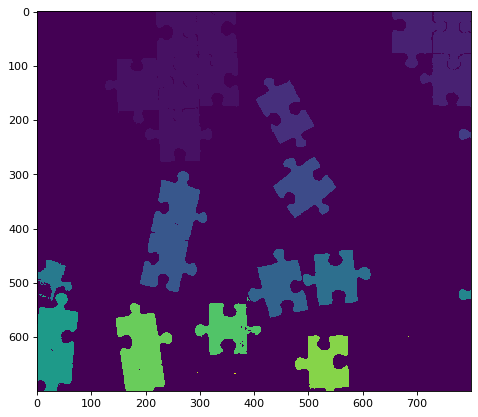

In [83]:
img = cv2.imread(imageName,cv2.IMREAD_COLOR)[800:1500,800:1600]#[2000:2170,2000:2150]
print(img.shape)
# imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2)
imghsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fig=plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img)
plt.show()

# edges = cv2.blur(imghsv,(1, 1))
edges = imghsv
# print(edges.shape)

# edgesv = edges[:,:,1]-100 + edges[:,:,2]-100
edgesv = edges[:,:,2]
# print(edgesv.shape)
# fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
# plt.imshow(edgesv)
# plt.show()


# blur = cv2.GaussianBlur(img,(5,5),0)
_,edges = cv2.threshold(edgesv,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(edges.shape)

# edges = cv2.Canny(edges,100,100, L2gradient=True)

# corners = cv2.cornerHarris(edges,2,3,0.4)
# corners = cv2.dilate(corners,None)
# imghsv[corners>0.01*corners.max()]=[255]

kernel = np.ones((2,2))
# edges = cv2.erode(edges, kernel, iterations=2)
# edges = cv2.morphologyEx(edges, cv2.MORPH_OPEN, kernel, iterations=1)
# edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
# edges = cv2.dilate(edges,kernel,iterations=2)


#REMOVE SMALL BLOBS (noise)
nb_components, labels, stats, centroids = cv2.connectedComponentsWithStats(edges, connectivity=8)
sizes = stats[:,4]
print("CONNECTED")
print(nb_components)
print(labels.shape)
print(stats.shape)
print(centroids.shape)
print(edges.shape)

nb_components = nb_components - 1
min_size = 1000
max_size = 10000

print("PIECES")
pieces = np.zeros((nb_components, edges.shape[0], edges.shape[1]), dtype=np.dtype('uint8'))
print(pieces.shape)

# mask = np.zeros(edges.shape, dtype=np.dtype('uint8'))
#info: 0:width 1:height
for i in range(0, nb_components):
    x = stats[i][0]
    y = stats[i][1]
    w = stats[i][2]
    h = stats[i][3]
    if sizes[i] >= min_size and sizes[i] <= max_size:
#         mask[labels==i] = 254
        pieces[i,0:h,0:w][labels[y:y+h, x:x+w]==i] = 254
        fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
        plt.imshow(pieces[i,0:h,0:w])
        plt.show()

# wmax = np.amax(pieces_info[:,0])        
# hmax = np.amax(pieces_info[:,1])

fig=plt.figure(figsize=(7, 7), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(labels)
plt.show()

# fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
# plt.imshow(edges)
# plt.show()

# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])


FIND CORNERS


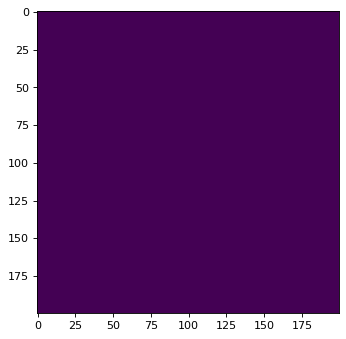

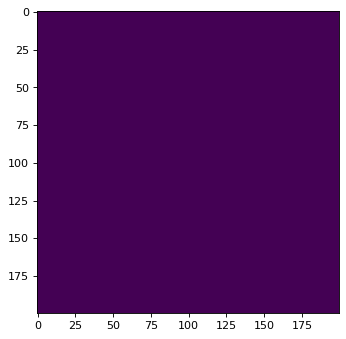

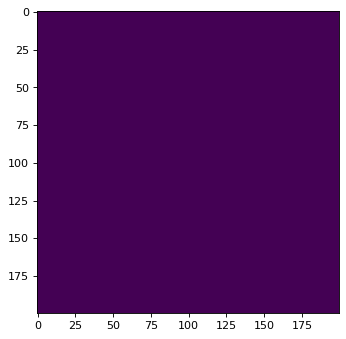

Find convex hull
(21, 1, 2)
(1, 21, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
6650.5
(1, 4, 2)
[[[ 45 121]
  [  0  40]
  [ 62   4]
  [107  86]]]


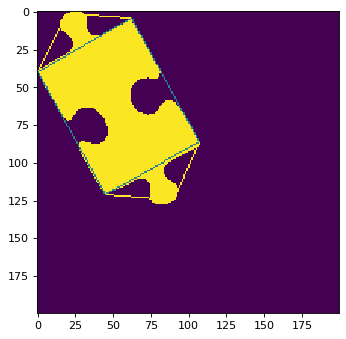

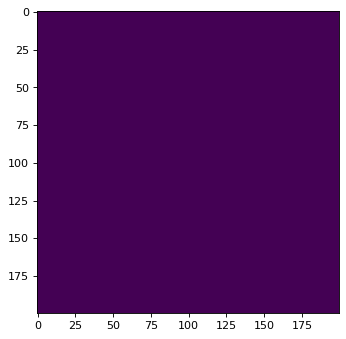

Find convex hull
(21, 1, 2)
(1, 21, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
6532.0
(1, 4, 2)
[[[116  57]
  [ 39 112]
  [  0  55]
  [ 75   0]]]


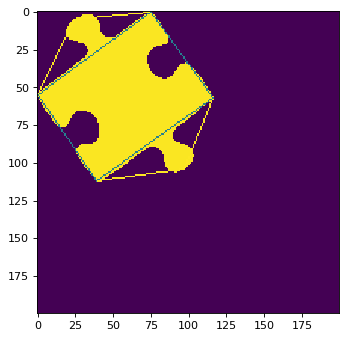

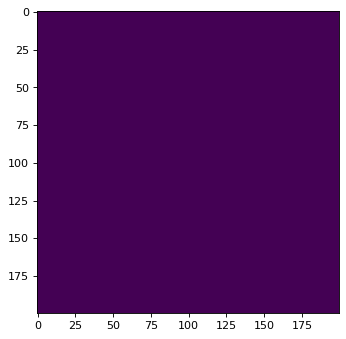

Find convex hull
(23, 1, 2)
(1, 23, 2)
Find points that comprehend the largest area
(7, 1, 2)
hulllc3 shape
(1, 7, 2)
Largest four points area
6807.5
(1, 4, 2)
[[[110 112]
  [ 41 127]
  [ 17  35]
  [ 91  22]]]


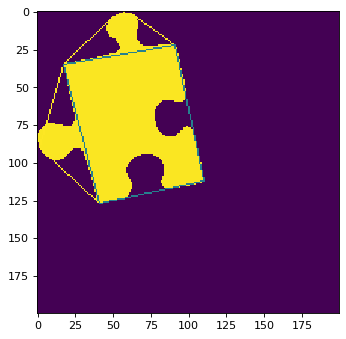

Find convex hull
(21, 1, 2)
(1, 21, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
6558.0
(1, 4, 2)
[[[100  94]
  [ 30 102]
  [ 22   8]
  [ 90   0]]]


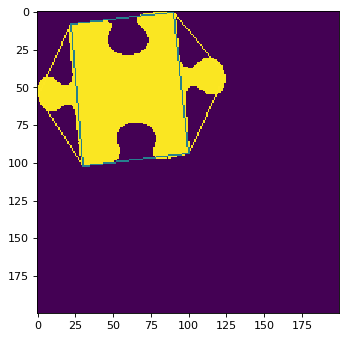

Find convex hull
(16, 1, 2)
(1, 16, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
No valid candidate found
Find convex hull
(4, 1, 2)
(1, 4, 2)
Find points that comprehend the largest area
(4, 1, 2)
hulllc3 shape
(1, 4, 2)
Largest four points area
2.0
(1, 4, 2)
[[[27 68]
  [26 69]
  [25 68]
  [26 67]]]
Find convex hull
(4, 1, 2)
(1, 4, 2)
Find points that comprehend the largest area
(4, 1, 2)
hulllc3 shape
(1, 4, 2)
Largest four points area
2.0
(1, 4, 2)
[[[28 67]
  [27 68]
  [26 67]
  [27 66]]]
Find convex hull
(7, 1, 2)
(1, 7, 2)
Find points that comprehend the largest area
(7, 1, 2)
hulllc3 shape
(1, 7, 2)
Largest four points area
No valid candidate found
Find convex hull
(4, 1, 2)
(1, 4, 2)
Find points that comprehend the largest area
(4, 1, 2)
hulllc3 shape
(1, 4, 2)
Largest four points area
2.0
(1, 4, 2)
[[[13 41]
  [12 42]
  [11 41]
  [12 40]]]


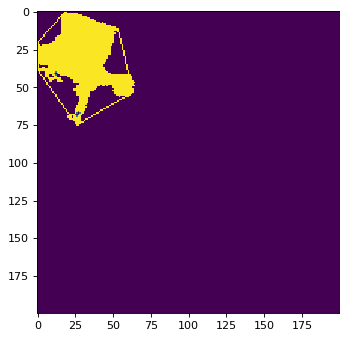

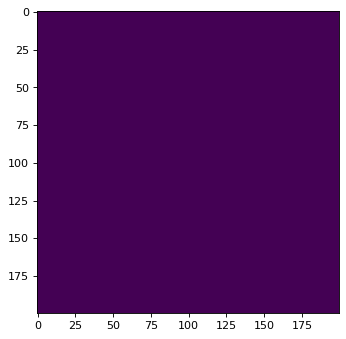

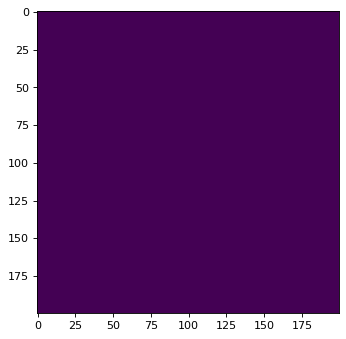

Find convex hull
(18, 1, 2)
(1, 18, 2)
Find points that comprehend the largest area
(7, 1, 2)
hulllc3 shape
(1, 7, 2)
Largest four points area
8734.0
(1, 4, 2)
[[[ 75  34]
  [ 63 160]
  [  0 161]
  [  4  27]]]
Find convex hull
(6, 1, 2)
(1, 6, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
No valid candidate found
Find convex hull
(4, 1, 2)
(1, 4, 2)
Find points that comprehend the largest area
(4, 1, 2)
hulllc3 shape
(1, 4, 2)
Largest four points area
2.0
(1, 4, 2)
[[[ 32 125]
  [ 31 126]
  [ 30 125]
  [ 31 124]]]
Find convex hull
(6, 1, 2)
(1, 6, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
No valid candidate found
Find convex hull
(6, 1, 2)
(1, 6, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
No valid candidate found
Find convex hull
(6, 1, 2)
(1, 6, 2)
Find points that comprehend the largest area
(6, 1

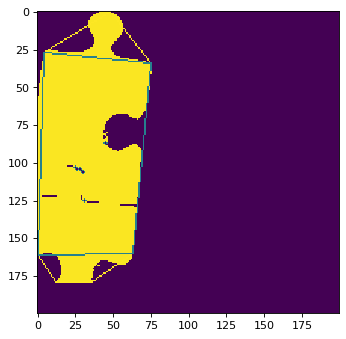

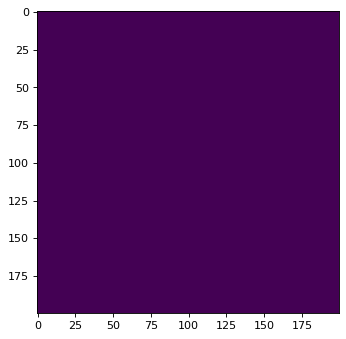

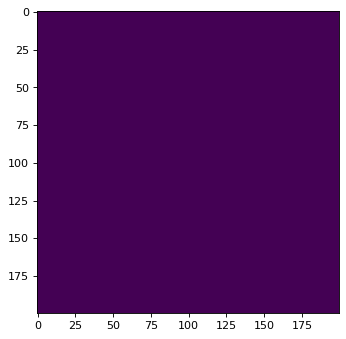

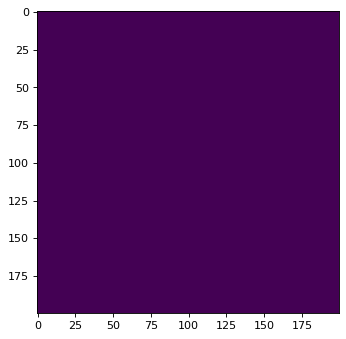

Find convex hull
(20, 1, 2)
(1, 20, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
5838.0
(1, 4, 2)
[[[120  49]
  [ 94  94]
  [  0  55]
  [ 28   0]]]
Find convex hull
(4, 1, 2)
(1, 4, 2)
Find points that comprehend the largest area
(4, 1, 2)
hulllc3 shape
(1, 4, 2)
Largest four points area
2.0
(1, 4, 2)
[[[82 91]
  [81 92]
  [80 91]
  [81 90]]]
Find convex hull
(5, 1, 2)
(1, 5, 2)
Find points that comprehend the largest area
(5, 1, 2)
hulllc3 shape
(1, 5, 2)
Largest four points area
No valid candidate found
Find convex hull
(4, 1, 2)
(1, 4, 2)
Find points that comprehend the largest area
(4, 1, 2)
hulllc3 shape
(1, 4, 2)
Largest four points area
2.0
(1, 4, 2)
[[[85 89]
  [84 90]
  [83 89]
  [84 88]]]
Find convex hull
(6, 1, 2)
(1, 6, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
No valid candidate found
Find convex hull
(8, 1, 2)
(1, 8, 2)
Find points that comprehend

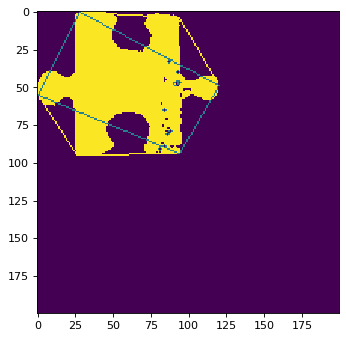

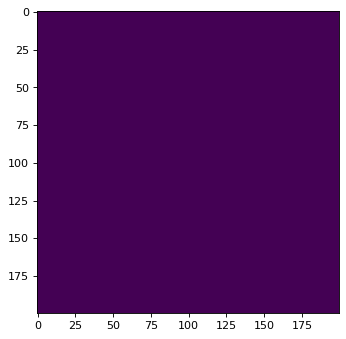

Find convex hull
(18, 1, 2)
(1, 18, 2)
Find points that comprehend the largest area
(6, 1, 2)
hulllc3 shape
(1, 6, 2)
Largest four points area
6808.5
(1, 4, 2)
[[[100  94]
  [ 28  98]
  [ 25   1]
  [ 97   2]]]


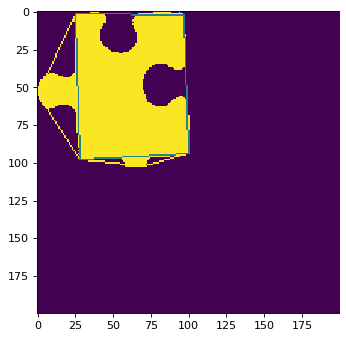

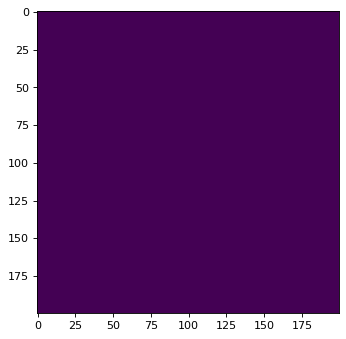

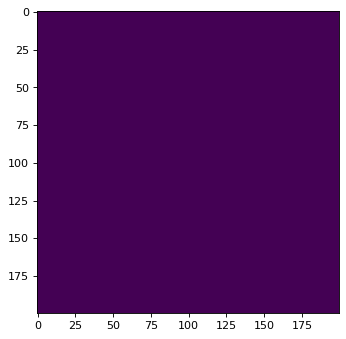

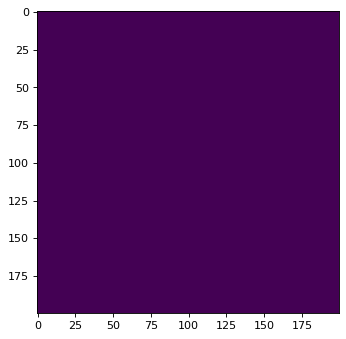

In [91]:
print("FIND CORNERS")

class Piece:
    left = None
    top = None
    width = None
    height = None
    mask = None
    body_points = None

detected_pieces = []

for i in range(0, len(pieces)):
    piece = pieces[i]
    stat = stats[i]
#     print(piece.shape)
#     fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
#     plt.imshow(piece)
#     plt.show()

#     fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
#     plt.imshow(hull[0:200,0:200])
#     plt.show()

#     piece_edges = cv2.Canny(piece,200,200)

#     piece_edges = cv2.dilate(piece_edges, np.ones((3,3)), iterations=8)
#     piece_edges = cv2.erode(piece_edges, np.ones((3,3)), iterations=8)
    
#     fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
#     plt.imshow(piece_edges[0:200,0:200])
#     plt.show()

#     corners = cv2.goodFeaturesToTrack(piece, maxCorners=4, qualityLevel=0.01, minDistance=80)

#     if corners is None: 
#         continue    

    mask2 = np.array(piece, copy=True)
#     for corner in corners:        
#         x,y = corner.ravel()
#         cv2.circle(mask2,(x,y),4,(155,20,255),-1)
        
    contours, hierarchy = cv2.findContours(piece, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for c in contours:
        print("Find convex hull")
        hull = cv2.convexHull(c)
        print(hull.shape)
#         print(hull)
#         cv2.drawContours(mask2, hull, 1, (155,20,255), 1, 8)

        hullc = hull.reshape((1, -1, 2))
        print(hullc.shape)
#         print(hullc)

#         cv2.polylines(mask2, hullc, 1, (255,255,255))

        print("Find points that comprehend the largest area")

        epsilon = 0.01 * cv2.arcLength(c, True)
        hullc2 = cv2.approxPolyDP(hullc, epsilon, True)
        print(hullc2.shape)
        
        #transform to one contour
        hullc3 = hullc2.reshape((1, -1, 2))
        print("hulllc3 shape")
        print(hullc3.shape)
        cv2.drawContours(mask2, hullc3, 0, (255,255,0))
        
        #test all point combinations looking for the largest area possible and square like angles
        largestArea = -1
        largestPoints = None
        l3 = len(hullc3[0])
        for a in range(0, l3):
            for b in range(a, l3+a):
                for c in range(b, l3+b):
                    for d in range(c, l3+c):

                        a = a % l3
                        b = b % l3
                        c = c % l3
                        d = d % l3
                        
                        pa = hullc3[0][a].tolist()
                        pb = hullc3[0][b].tolist()
                        pc = hullc3[0][c].tolist()
                        pd = hullc3[0][d].tolist()

                        candidate = np.array([[pa, pb, pc, pd]])
                        
                        ta = [(row == pa) for row in [pb,pc,pd]]
                        tb = [(row == pb) for row in [pa,pc,pd]]
                        tc = [(row == pc) for row in [pa,pb,pd]]
                        td = [(row == pd) for row in [pa,pb,pc]]
                        if np.any(ta) or np.any(tb) or np.any(tc) or np.any(td):
                            continue

#                         print("TEST CANDIDATE")
#                         print(candidate)

                        area = cv2.contourArea(candidate)
                        if area > largestArea:
                            
                            #print("verify if corner angles are near 90o")
                            valid_angles = False
                            ra = candidate[0]
                            angles = []
                            for i in range(0,4):
                                angle = calc.angle_between_points(ra)
                                angle = abs(angle)
                                if angle > 180:
                                    angle = 360-180
                                angles.append(angle)
#                                 print(angle)
                                if math.isnan(angle) or angle > 100 or angle < 80:
                                    valid_angles = False
                                    break
                                else:
                                    valid_angles = True
#                                     print("VALID ANGLE ", angle)
            
                                ra = np.roll(ra, 1, axis=0)

                            if valid_angles:
                                largestArea = area
                                largestPoints = candidate
#                                 print("GOOD CANDIDATE")
#                                 print(angles)
#                                 print(area)
#                                 print(candidate)
#                             else:
#                                 print("Large area but not square")
#                                 print(angles)
#                                 print(area)
#                                 print(candidate)

        print("Largest four points area")
        if largestPoints is not None:
            print(largestArea)
            print(largestPoints.shape)
            print(largestPoints)

            dpiece = Piece()
            dpiece.body_points = largestPoints
            dpiece.left = stat[0]
            dpiece.top = stat[1]
            dpiece.width = stat[2]
            dpiece.height = stat[3]
            dpiece.mask = piece

            detected_pieces.append(dpiece)
            cv2.polylines(mask2, [dpiece.body_points], 1, (111,111,111))
               
        else:
            print("No valid candidate found")
#         cv2.circle(mask2,(x,y),4,(155,20,255),-1)
        
#     circles = cv2.HoughCircles(piece_edges, cv2.HOUGH_GRADIENT, 1, 1)
#     print(circles)
#     if circles is not None:
#         for circle in circles:
#             x,y,r = circle.ravel()
#             cv2.circle(mask2,(x,y),r,(155,20,255),-1)
#     else:
#         print("No circles found")

#     lines = cv2.HoughLinesP(piece_edges,1,np.pi/180,100,10,10)
#     if lines is not None:
#         for l in lines:
#             for x1,y1,x2,y2 in l:
#                 cv2.line(mask2,(x1,y1),(x2,y2),(100,255,100),2)

    fig=plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(mask2[0:200,0:200])
    plt.show()
